In [489]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
import itertools


In [490]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [491]:
# Importing the dataset
dataset = pd.read_csv('F:/data1.csv')

X = dataset.iloc[:, 1:27].values
Y = dataset.iloc[:,[-1]].values

dataset.head(10)

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues
5,blues.00005.wav,0.302346,0.103468,1831.942368,1729.483241,3480.937285,0.094040,-177.869048,118.196916,-17.550673,...,-2.420615,-9.339365,-9.939325,-3.909892,-5.570625,-1.839023,-2.778421,-3.046866,-8.115809,blues
6,blues.00006.wav,0.291308,0.141796,1459.078483,1388.913312,2795.616429,0.073028,-190.149470,130.296951,-36.344138,...,-3.125678,-6.593118,-9.942268,-6.537224,-10.064755,-10.912171,-6.972479,-3.449033,-6.495511,blues
7,blues.00007.wav,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,...,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,blues
8,blues.00008.wav,0.409037,0.142438,1719.213163,2031.643884,3781.318802,0.064028,-121.361024,122.513116,-14.742130,...,7.010945,-12.741833,5.066005,-5.175478,-1.444025,-7.037070,2.697451,3.409809,-2.698353,blues
9,blues.00009.wav,0.274009,0.081352,1817.516386,1973.739070,3944.451148,0.079215,-213.180803,115.152794,-11.716264,...,3.784770,0.225669,-5.113638,-0.413063,-1.184538,-1.920714,-2.293728,2.891266,-4.233204,blues


In [492]:
# Label Encode the output values
le = LabelEncoder()
Y=le.fit_transform(Y)
#Y

C:\temp\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [493]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [494]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [495]:
svmclassifier = SVC(kernel = 'rbf', random_state = 42, gamma = 'auto')
svmclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [496]:
# Accuracy Score of the algorithm

y_pred = svmclassifier.predict(X_test)

accuracy_score(y_pred, y_test)

0.68

In [497]:
y_pred.shape
# for item_a, item_b in zip(y_test, y_pred):
#     print(item_a, item_b)

(300,)

In [498]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge



In [499]:
# Confusion Mtarix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [500]:
# Calculate COnfusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[24,  0,  1,  1,  0,  2,  2,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 3,  0, 18,  2,  0,  4,  0,  2,  0,  3],
       [ 1,  0,  1, 12,  4,  0,  0,  4,  3,  9],
       [ 0,  0,  0,  5, 14,  0,  0,  1,  4,  2],
       [ 0,  0,  1,  1,  2, 18,  0,  0,  1,  2],
       [ 2,  0,  0,  2,  0,  0, 37,  0,  1,  2],
       [ 2,  0,  1,  2,  0,  0,  0, 25,  2,  0],
       [ 0,  0,  0,  0,  4,  1,  0,  1, 18,  3],
       [ 2,  0,  1,  2,  1,  2,  0,  0,  3, 12]], dtype=int64)

Confusion matrix, without normalization
Normalized confusion matrix


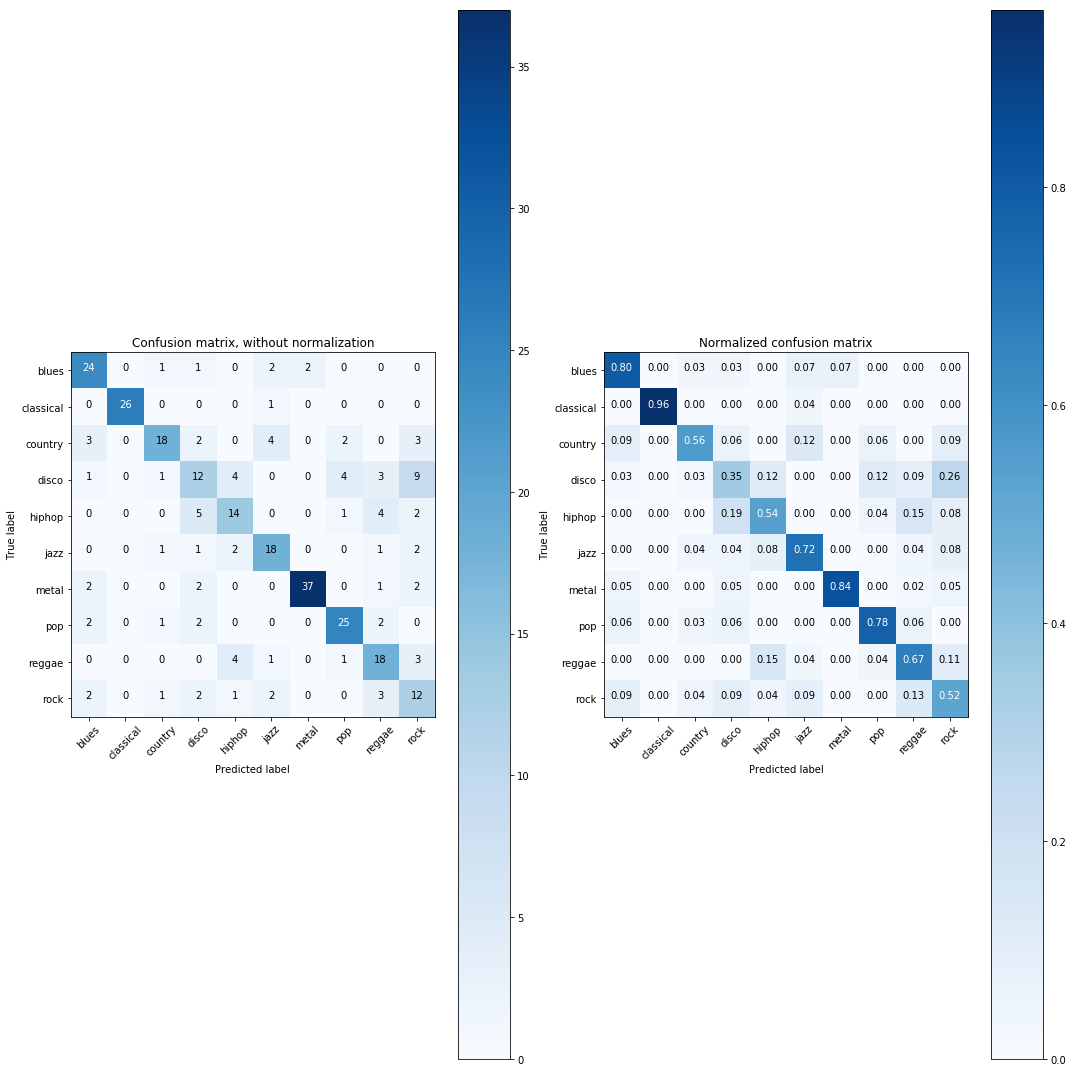

In [501]:
# Plot CM without normalisation
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=genres,
                      title='Confusion matrix, without normalization')

plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=True,
                      title='Normalized confusion matrix')


plt.tight_layout()
plt.show()

In [502]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print([accuracies.mean(), accuracies.std()])


[0.641221054063738, 0.03919482656799274]


In [503]:
TP = np.diag(cnf_matrix)

FP = []
for i in range(10):
    FP.append(sum(cnf_matrix[:,i]) - cnf_matrix[i,i])

FN = []
for i in range(10):
    FN.append(sum(cnf_matrix[i,:]) - cnf_matrix[i,i])

TN = []
for i in range(10):
    temp = np.delete(cnf_matrix, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
    
l = len(y_test)
for i in range(10):
    print((TP[i] + FP[i] + FN[i] + TN[i]) == l)

True
True
True
True
True
True
True
True
True
True


In [504]:
values = np.array([TP, FP, FN, TN])
print('\tTP', '  FP', '  FN', '  TN')
values.T

	TP   FP   FN   TN


array([[ 24,  10,   6, 260],
       [ 26,   0,   1, 273],
       [ 18,   5,  14, 263],
       [ 12,  15,  22, 251],
       [ 14,  11,  12, 263],
       [ 18,  10,   7, 265],
       [ 37,   2,   7, 254],
       [ 25,   8,   7, 260],
       [ 18,  14,   9, 259],
       [ 12,  21,  11, 256]], dtype=int64)

In [505]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.71      0.80      0.75        30
          1       1.00      0.96      0.98        27
          2       0.78      0.56      0.65        32
          3       0.44      0.35      0.39        34
          4       0.56      0.54      0.55        26
          5       0.64      0.72      0.68        25
          6       0.95      0.84      0.89        44
          7       0.76      0.78      0.77        32
          8       0.56      0.67      0.61        27
          9       0.36      0.52      0.43        23

avg / total       0.69      0.68      0.68       300



In [506]:
from sklearn.metrics import precision_recall_fscore_support as result

precision, recall ,fscore, support = result(y_test, y_pred)



In [507]:
sensitivity = TP/(TP + FN)
specificity = np.array(TN)/(np.array(TN) + np.array(FP))
print('precision','\trecall','\t   sensitivity','\t  specificity','\t      f1-score','\t     support')
for a,b,c,d,e,f in zip(precision,recall,sensitivity,specificity,fscore,support):
    print(a.round(2),'\t\t',b.round(2),'\t\t',c.round(2),'\t\t',d.round(2),'\t\t',e.round(2),'\t\t',f.round(2))

print('\navg / total')
print(np.mean(precision).round(2),'\t\t',np.mean(recall).round(2),'\t\t',np.mean(sensitivity).round(2),'\t\t', np.mean(specificity).round(2),'\t\t', np.mean(fscore).round(2),'\t\t', np.mean(support).round(2))    


precision 	recall 	   sensitivity 	  specificity 	      f1-score 	     support
0.71 		 0.8 		 0.8 		 0.96 		 0.75 		 30
1.0 		 0.96 		 0.96 		 1.0 		 0.98 		 27
0.78 		 0.56 		 0.56 		 0.98 		 0.65 		 32
0.44 		 0.35 		 0.35 		 0.94 		 0.39 		 34
0.56 		 0.54 		 0.54 		 0.96 		 0.55 		 26
0.64 		 0.72 		 0.72 		 0.96 		 0.68 		 25
0.95 		 0.84 		 0.84 		 0.99 		 0.89 		 44
0.76 		 0.78 		 0.78 		 0.97 		 0.77 		 32
0.56 		 0.67 		 0.67 		 0.95 		 0.61 		 27
0.36 		 0.52 		 0.52 		 0.92 		 0.43 		 23

avg / total
0.68 		 0.67 		 0.67 		 0.96 		 0.67 		 30.0


In [508]:
# from sklearn.metrics import roc_curve, auc

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)
print(roc_auc_score(y_test, y_pred, average="macro"))

0.8197039320661519


In [509]:
y_plot = [y_test, y_pred]
x_plot = np.arange(10)
# for i, j in zip(np.argmax(y_plot[0],axis = 1),np.argmax(y_plot[1],axis = 1)):
#     print(i,j)

In [510]:
y_test_x, y_test_y = np.unique(np.argmax(y_plot[0],axis = 1), return_counts = True)
y_pred_x, y_pred_y = np.unique(np.argmax(y_plot[1],axis = 1), return_counts = True)



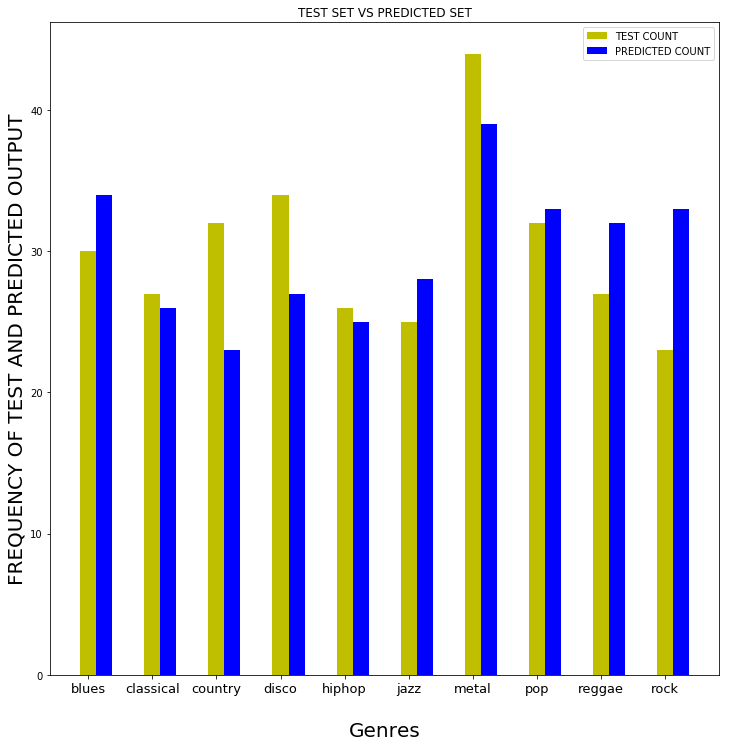

In [511]:
plt.figure(figsize=(12,12))
plt.bar(x_plot +0.00 , y_test_y, color = 'y', width = 0.25)
plt.bar(x_plot + 0.25 , y_pred_y, color = 'b', width = 0.25)
plt.xlabel('\nGenres',fontsize=20)
plt.ylabel('FREQUENCY OF TEST AND PREDICTED OUTPUT',fontsize=20)
classes = genres
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0,fontsize=13)
#plt.yticks(tick_marks, classes)
plt.title('TEST SET VS PREDICTED SET')
plt.legend(('TEST COUNT', 'PREDICTED COUNT'))